In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/MNIST.zip

Archive:  /content/drive/MyDrive/MNIST.zip
  inflating: MNIST_X_28x28.npy       
  inflating: MNIST_y.npy             


In [ ]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from random import randrange
from sklearn.cluster import KMeans
%matplotlib inline

In [ ]:
#Loading the data
mnist_x = np.load('MNIST_X_28x28.npy')
mnist_y = np.load('MNIST_y.npy')

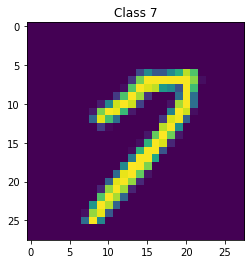

<Figure size 432x288 with 0 Axes>

In [ ]:
#plotting a sample 
nb_sample = randrange(0, 70000)
plt.imshow(mnist_x[nb_sample])
img_title = 'Class ' + str(mnist_y[nb_sample])
plt.title(img_title)
plt.show()
plt.clf()

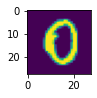

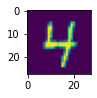

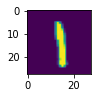

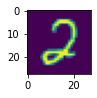

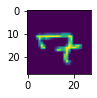

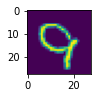

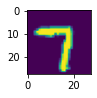

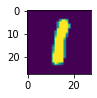

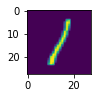

In [ ]:
from matplotlib import pyplot
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(mnist_x[i])
    pyplot.show()

In [ ]:
print('Shape of MNIST dataset ' + str(mnist_x.shape))

Shape of MNIST dataset (70000, 28, 28)


Text(0, 0.5, 'quantity')

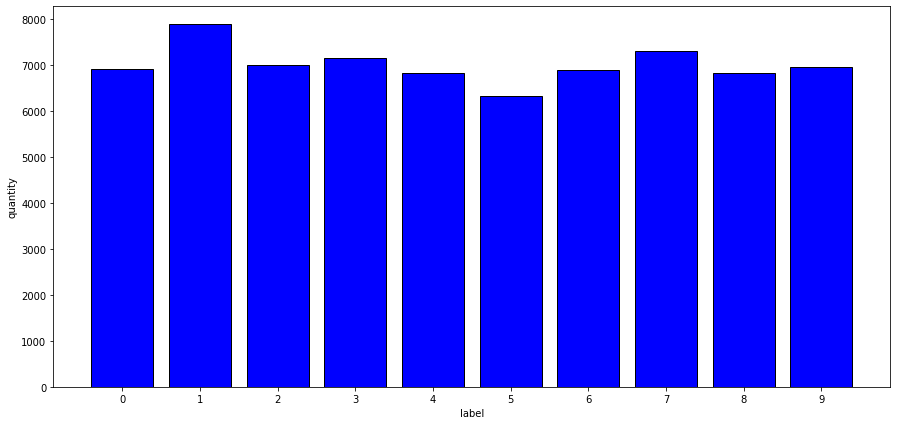

In [ ]:
#plot a histogram to see if data is well balanced or no
values, counts = np.unique(mnist_y, return_counts=True)
plt.figure(figsize = (15, 7))
plt.xticks(range(10))
plt.bar(values, counts, align='center',color='blue', edgecolor ='black', label='MNIST Histogram')
plt.xlabel('label')
plt.ylabel('quantity')

# Unsupervised Machine Learning


In [ ]:
#split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(mnist_x, mnist_y, test_size=0.2, shuffle=False)

In [ ]:
X_train.shape

(56000, 28, 28)

In [ ]:
#we will try to reshape the data into 2 dimensions one for each sample and second for all 784 pixels of each sample
X_train_pca_2 = X_train.reshape(X_train.shape[0],-1)
X_train_pca_2.shape


(56000, 784)

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train_pca_2)
X_train_pca_2 = pca.transform(X_train_pca_2)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.09758625 0.0714951 ]
[136892.32406512 117171.75330999]


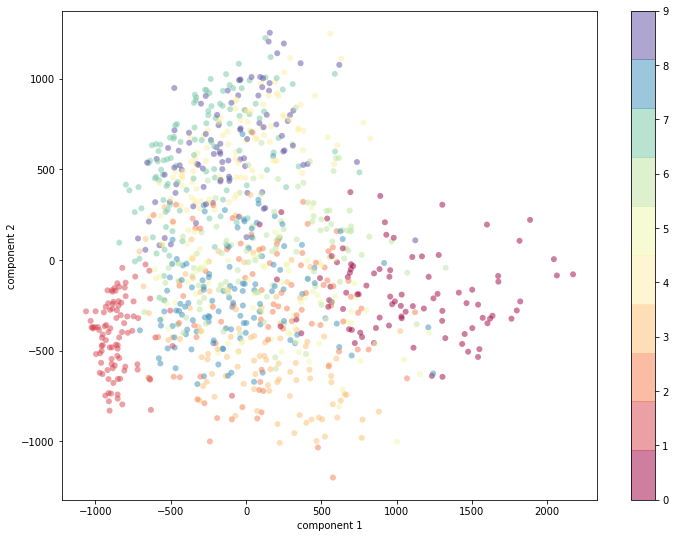

In [ ]:
fig = plt.figure(1, figsize=(12, 9))
plt.scatter(X_train_pca_2[:1000,0], X_train_pca_2[:1000,1], c=y_train[:1000], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

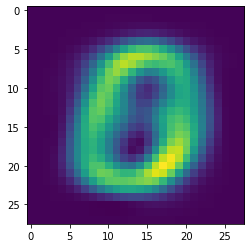

<Figure size 432x288 with 0 Axes>

In [ ]:
#This part of code takes the Training set and apply PCA for K components then show the image
X_train_r = X_train.reshape( len ( X_train ), -1)
pca = PCA(n_components=3)
X_train_pca = pca.fit(X_train_r).transform(X_train_r)
X_train_pca.shape
X_rec = [x.reshape(28, 28) for x in pca.inverse_transform(X_train_pca)]
plt.imshow(X_rec[0])
plt.show()
plt.clf()

In [ ]:
pca = PCA(n_components=400)
X_train_resahpe = X_train.reshape( len ( X_train ), -1)
pca.fit(X_train_resahpe)
components = pca.transform(X_train_resahpe)
projected = pca.inverse_transform(components)

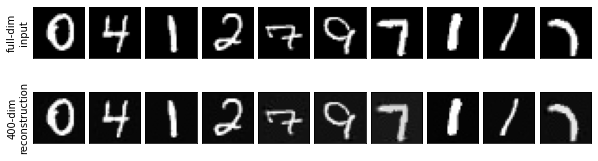

In [ ]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 3),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(X_train_resahpe[i].reshape(28, 28), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(28, 28), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('400-dim\nreconstruction');

In [ ]:
pca = PCA(n_components=100)
pca.fit(X_train_resahpe)
components = pca.transform(X_train_resahpe)
projected = pca.inverse_transform(components)

Text(0, 0.5, '100-dim\nreconstruction')

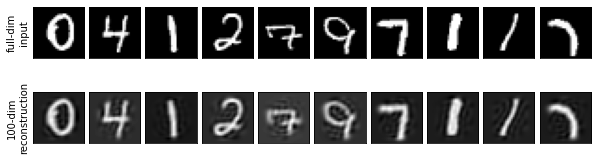

In [ ]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 3),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(X_train_resahpe[i].reshape(28, 28), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(28, 28), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('100-dim\nreconstruction')

In [ ]:
pca = PCA(n_components=5)
pca.fit(X_train_resahpe)
components = pca.transform(X_train_resahpe)
projected = pca.inverse_transform(components)

Text(0, 0.5, '5-dim\nreconstruction')

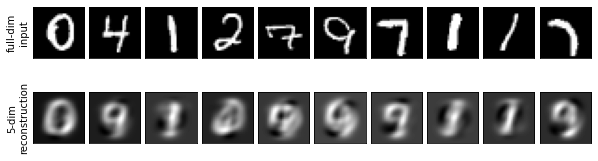

In [ ]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 3),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(X_train_resahpe[i].reshape(28, 28), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(28, 28), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('5-dim\nreconstruction')

Text(0, 0.5, 'cumulative explained variance')

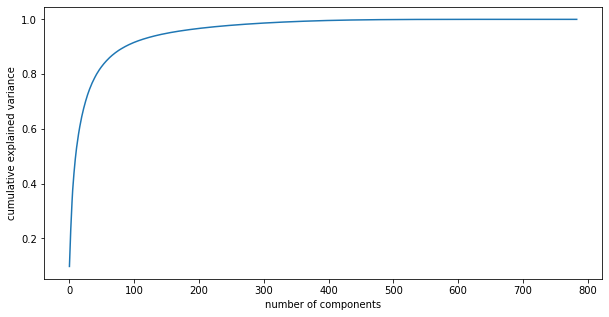

In [ ]:
X_train_resahpe = X_train.reshape(X_train.shape[0],-1)
pca = PCA().fit(X_train_resahpe)
fig = plt.figure(1, figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
print("400-dim :" , sum(pca.explained_variance_ratio_[:400]))
print("100-dim :" , sum(pca.explained_variance_ratio_[:100]))
print("5-dim :" , sum(pca.explained_variance_ratio_[:5]))

400-dim : 0.9958782979690013
100-dim : 0.9151003435756221
5-dim : 0.33347360970117906


In [ ]:
print("200-dim :" , sum(pca.explained_variance_ratio_[:200]))

200-dim : 0.9666280423567757


## Data clustering

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(mnist_x, mnist_y, test_size=0.2, shuffle=False)
X_train = X_train.reshape(X_train.shape[0],-1)
kmeans = KMeans(n_clusters=6, random_state=0).fit(X_train)

In [ ]:
def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    inferred_labels = {}

    # Loop through the clusters
    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]
        
    return inferred_labels  

def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """
    
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

In [ ]:
from sklearn.metrics import accuracy_score
cluster_labels = infer_cluster_labels(kmeans, y_train)
X_clusters = kmeans.predict(X_train)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
accuracy_score(predicted_labels, y_train)

0.47344642857142855

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(mnist_x, mnist_y, test_size=0.2, shuffle=False)
X_train = X_train.reshape(X_train.shape[0],-1)
kmeansplus = KMeans(n_clusters=10, init='k-means++', n_init=4, random_state=0).fit(X_train)

In [ ]:
from sklearn.metrics import accuracy_score
cluster_labels = infer_cluster_labels(kmeansplus, y_train)
X_clusters = kmeansplus.predict(X_train)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
accuracy_score(predicted_labels, y_train)

0.5845535714285715

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(mnist_x, mnist_y, test_size=0.2, shuffle=False)
X_train = X_train.reshape(X_train.shape[0],-1)
kmeansrandom = KMeans(init='random', n_clusters=10, n_init=4, random_state=0).fit(X_train)

In [ ]:
cluster_labels = infer_cluster_labels(kmeansrandom, y_train)
X_clusters = kmeansrandom.predict(X_train)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
accuracy_score(predicted_labels, y_train)

0.5805

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(mnist_x, mnist_y, test_size=0.2, shuffle=False)
X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)
pca = PCA(n_components=2)
pca.fit(X_train)

PCA(n_components=2)

In [ ]:
X_train_red = pca.transform(X_train)
X_test_red = pca.transform(X_test)
kmeans_pca = KMeans(init='k-means++', n_clusters=10, n_init=1)
kmeans_pca.fit(X_train_red,y_train)

KMeans(n_clusters=10, n_init=1)

In [ ]:
cluster_labels_pca = infer_cluster_labels(kmeans_pca, y_train)
X_clusters_pca = kmeans_pca.predict(X_test_red)
predicted_labels_pca = infer_data_labels(X_clusters_pca, cluster_labels_pca)
accuracy_score(predicted_labels_pca, y_test)

0.41678571428571426

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(mnist_x, mnist_y, test_size=0.2, shuffle=False)
X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)
pca = PCA(n_components=400)
pca.fit(X_train)

PCA(n_components=400)

In [ ]:
X_train_red = pca.transform(X_train)
X_test_red = pca.transform(X_test)
kmeans_pca = KMeans(init='k-means++', n_clusters=10, n_init=33)
kmeans_pca.fit(X_train_red,y_train)

KMeans(n_clusters=10, n_init=33)

In [ ]:
cluster_labels_pca = infer_cluster_labels(kmeans_pca, y_train)
X_clusters_pca = kmeans_pca.predict(X_test_red)
predicted_labels_pca = infer_data_labels(X_clusters_pca, cluster_labels_pca)
accuracy_score(predicted_labels_pca, y_test)

0.5839285714285715

In [ ]:
from sklearn.mixture import GaussianMixture
X_train, X_test, y_train, y_test = train_test_split(mnist_x, mnist_y, test_size=0.2, shuffle=False)
X_train = X_train.reshape(X_train.shape[0],-1)
gm = GaussianMixture(n_components=10, random_state=0).fit(X_train[:20000])

In [ ]:
X_test = X_test.reshape(X_test.shape[0],-1)

In [ ]:
X_clusters_gm = gm.predict(X_test)
accuracy_score(X_clusters_gm, y_test)

0.05971428571428571

# Supervised Machine Learning

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix

## Support Vector Machine SVM

In [ ]:
#split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(mnist_x, mnist_y,  train_size = 0.3, test_size=0.1, random_state = 13)

In [ ]:
X_train = X_train/ 255.0
X_test = X_test/ 255.0
X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)

In [ ]:
y_train.shape

(21000,)

In [ ]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred_linear = model_linear.predict(X_test)

In [ ]:
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_linear), "\n")

accuracy: 0.9245714285714286 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


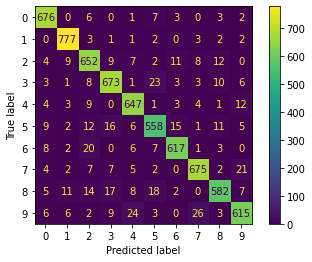

In [ ]:
plot_confusion_matrix(model_linear, X_test, y_test)  
plt.show()

In [ ]:
# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred_non_linear = non_linear_model.predict(X_test)

In [ ]:
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_non_linear), "\n")

accuracy: 0.9675714285714285 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


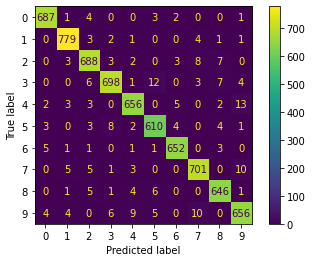

In [ ]:
plot_confusion_matrix(non_linear_model, X_test, y_test)  
plt.show()


In [ ]:
#split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(mnist_x, mnist_y,  train_size = 0.3, test_size=0.1, random_state = 13)
X_train = X_train/ 255.0
X_test = X_test/ 255.0
X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)

In [ ]:
pca = PCA(n_components=100)
pca.fit(X_train)
X_train_red = pca.transform(X_train)
X_test_red = pca.transform(X_test)

In [ ]:
# model
non_linear_model_lower_dim = SVC(kernel='linear')

# fit
non_linear_model_lower_dim.fit(X_train_red, y_train)

# predict
y_pred_non_linear_lower_dim = non_linear_model_lower_dim.predict(X_test_red)

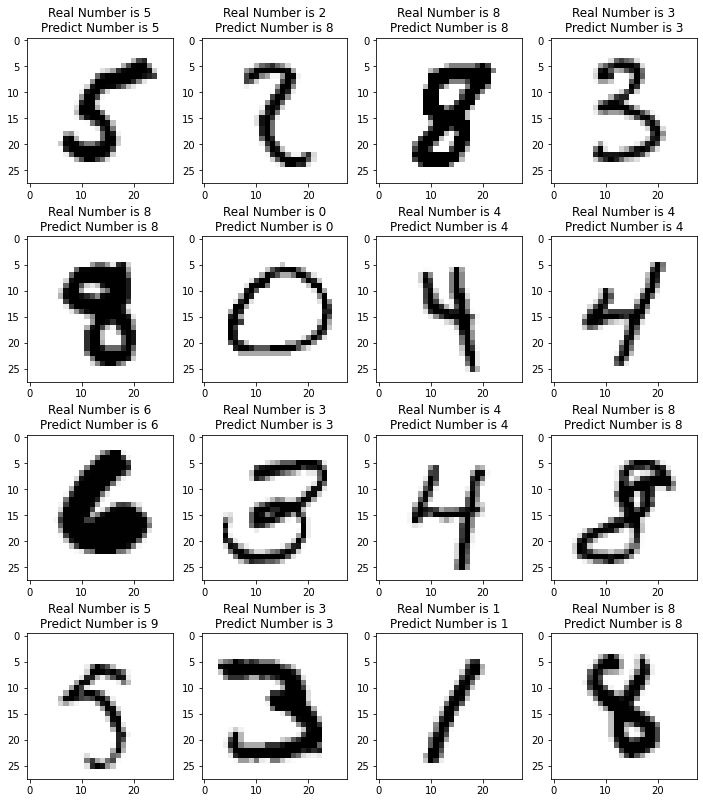

In [ ]:
#X_test = X_test.reshape(X_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test[i].reshape(28,28), cmap='binary')
    ax.set(title = f"Real Number is {y_test[i]}\nPredict Number is {y_pred_non_linear_lower_dim[i]}");

In [ ]:
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_non_linear_lower_dim), "\n")

accuracy: 0.9314285714285714 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


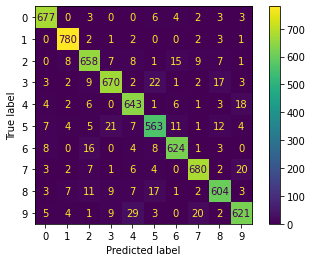

In [ ]:
plot_confusion_matrix(non_linear_model_lower_dim, X_test_red, y_test)  
plt.show()

## Decision Tree

In [ ]:
#split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(mnist_x, mnist_y,  test_size=0.1, random_state = 13)
X_train = X_train/ 255.0
X_test = X_test/ 255.0
X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)

In [ ]:
X_test.shape

(7000, 28, 28)

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

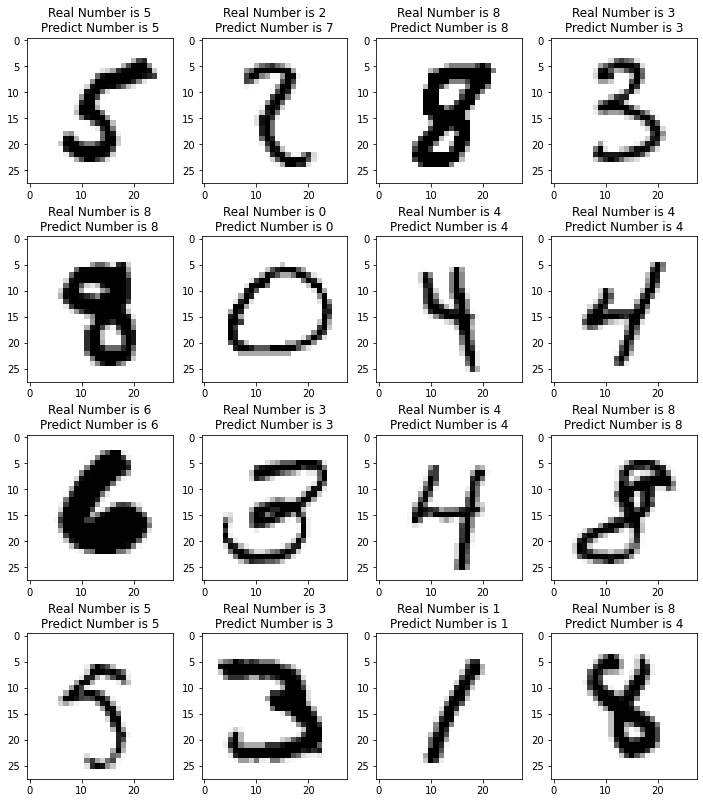

In [ ]:
X_test = X_test.reshape(X_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i]}\nPredict Number is {y_pred[i]}");

In [ ]:
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

accuracy: 0.8705714285714286 



In [ ]:
pca = PCA(n_components=100)
pca.fit(X_train)
X_train_red = pca.transform(X_train)
X_test_red = pca.transform(X_test)

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_red, y_train)
y_pred = clf.predict(X_test_red)

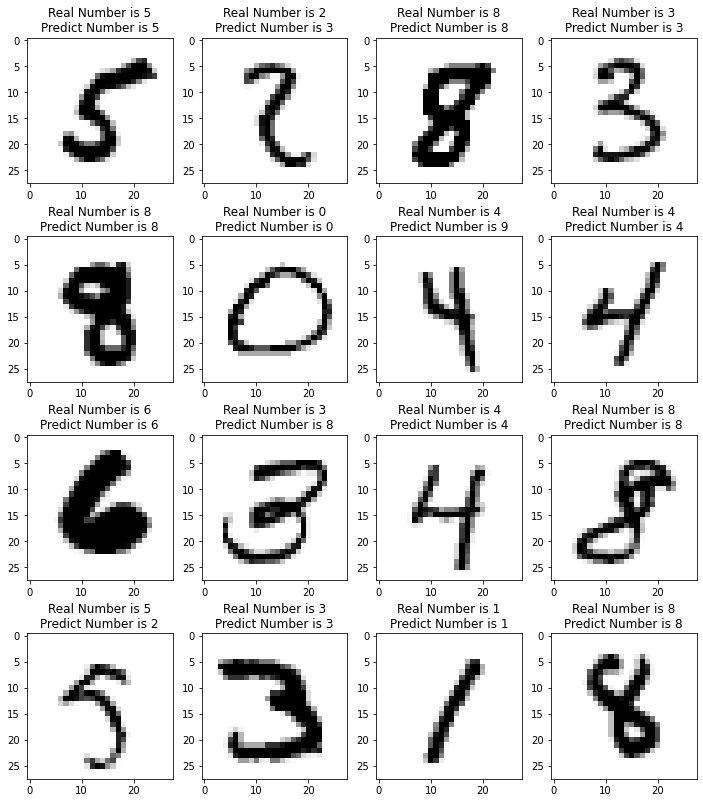

In [ ]:
X_test = X_test.reshape(X_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i]}\nPredict Number is {y_pred[i]}");

In [ ]:
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

accuracy: 0.8415714285714285 



# Deep Learning MLP

In [ ]:
from keras import models, Model
from keras import layers
from keras import optimizers

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(mnist_x, mnist_y, test_size=0.1, shuffle=True)

In [ ]:
X_train = X_train/ 255.0
X_test = X_test/ 255.0

In [ ]:
input_ = layers.Input(shape=[28,28])
flatten = layers.Flatten(input_shape=[28, 28])(input_)
layer1 = layers.Dense(32, activation="relu")(flatten)
output = layers.Dense(10, activation='softmax')(layer1)
model = Model(inputs=[input_], outputs=[output] )
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, shuffle=True, batch_size=32, validation_split=0.3)

Epoch 1/10
1379/1379 [==============================] - 4s 2ms/step - loss: 0.7929 - accuracy: 0.7983 - val_loss: 0.4327 - val_accuracy: 0.8809
Epoch 2/10
1379/1379 [==============================] - 3s 2ms/step - loss: 0.3778 - accuracy: 0.8970 - val_loss: 0.3483 - val_accuracy: 0.9003
Epoch 3/10
1379/1379 [==============================] - 3s 2ms/step - loss: 0.3237 - accuracy: 0.9106 - val_loss: 0.3162 - val_accuracy: 0.9093
Epoch 4/10
1379/1379 [==============================] - 3s 2ms/step - loss: 0.2955 - accuracy: 0.9178 - val_loss: 0.2996 - val_accuracy: 0.9142
Epoch 5/10
1379/1379 [==============================] - 3s 2ms/step - loss: 0.2757 - accuracy: 0.9229 - val_loss: 0.2928 - val_accuracy: 0.9181
Epoch 6/10
1379/1379 [==============================] - 3s 2ms/step - loss: 0.2605 - accuracy: 0.9276 - val_loss: 0.2692 - val_accuracy: 0.9234
Epoch 7/10
1379/1379 [==============================] - 3s 2ms/step - loss: 0.2470 - accuracy: 0.9304 - val_loss: 0.2578 - val_accuracy:

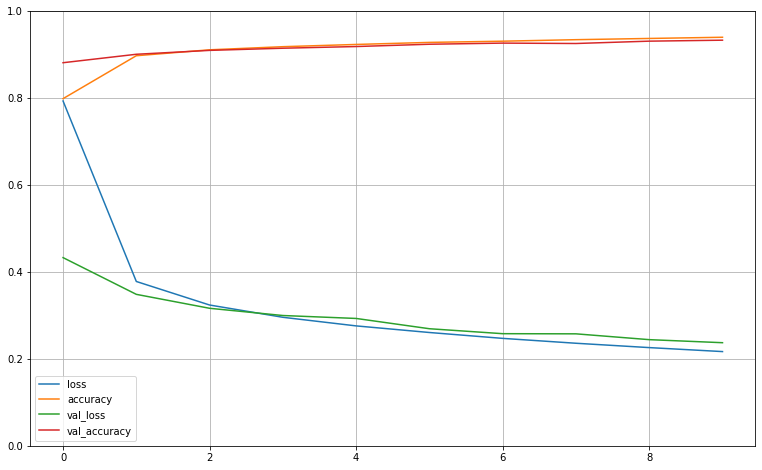

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(13, 8))
plt.grid(True)
plt.gca().set_ylim(0.00, 1.00) 
plt.show()

In [ ]:
score_model = model.evaluate(X_test, y_test)
score_model

219/219 [==============================] - 0s 1ms/step - loss: 0.2486 - accuracy: 0.9280


[0.24858981370925903, 0.9279999732971191]

Text(0.5, 1.0, 'Loss Score 0.25 , Accuracy Score: 0.93')

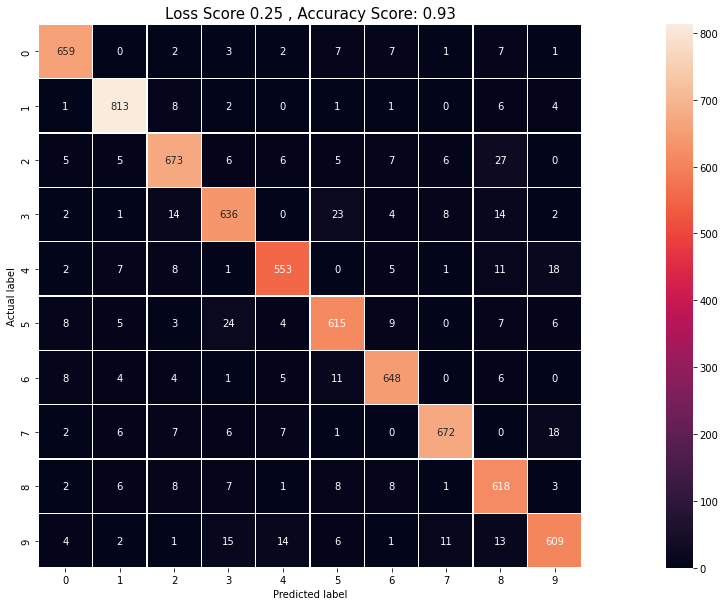

In [ ]:
import seaborn as sns
predictions = model.predict(X_test).argmax(axis=-1)
cm = confusion_matrix(y_test,predictions)
plt.figure(figsize=(30,10))
sns.heatmap(cm,annot=True, linewidths=.5, fmt="d" ,square=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Loss Score {:.2f} , Accuracy Score: {:.2f}'.format(score[0],score[1])
plt.title(all_sample_title,size=15)

In [ ]:
input_ = layers.Input(shape=[28,28])
flatten = layers.Flatten(input_shape=[28, 28])(input_)
layer1 = layers.Dense(64, activation="relu" , )(flatten)
hidden1 = layers.Dense(64, activation='relu')(layer1)
hidden2 = layers.Dense(32, activation='relu')(hidden1)
hidden3 = layers.Dense(32, activation='relu')(hidden2)
hidden4 = layers.Dense(16, activation='relu')(hidden3)
output = layers.Dense(10, activation='softmax')(hidden4)
model_overfit = Model(inputs=[input_], outputs=[output] )
model_overfit.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 16)                528 

In [ ]:
from tensorflow import keras
#opt = keras.optimizers.Adam()
model_overfit.compile(loss="sparse_categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
history_overfit = model_overfit.fit(X_train, y_train, epochs=50, batch_size=256, validation_split=0.3)

Epoch 1/50
173/173 [==============================] - 2s 7ms/step - loss: 0.8211 - accuracy: 0.7499 - val_loss: 0.3436 - val_accuracy: 0.9079
Epoch 2/50
173/173 [==============================] - 1s 6ms/step - loss: 0.2651 - accuracy: 0.9293 - val_loss: 0.2322 - val_accuracy: 0.9365
Epoch 3/50
173/173 [==============================] - 1s 6ms/step - loss: 0.1796 - accuracy: 0.9498 - val_loss: 0.1909 - val_accuracy: 0.9464
Epoch 4/50
173/173 [==============================] - 1s 6ms/step - loss: 0.1384 - accuracy: 0.9604 - val_loss: 0.1649 - val_accuracy: 0.9529
Epoch 5/50
173/173 [==============================] - 1s 7ms/step - loss: 0.1148 - accuracy: 0.9670 - val_loss: 0.1575 - val_accuracy: 0.9540
Epoch 6/50
173/173 [==============================] - 1s 7ms/step - loss: 0.0984 - accuracy: 0.9706 - val_loss: 0.1377 - val_accuracy: 0.9605
Epoch 7/50
173/173 [==============================] - 1s 6ms/step - loss: 0.0840 - accuracy: 0.9752 - val_loss: 0.1287 - val_accuracy: 0.9629
Epoch 

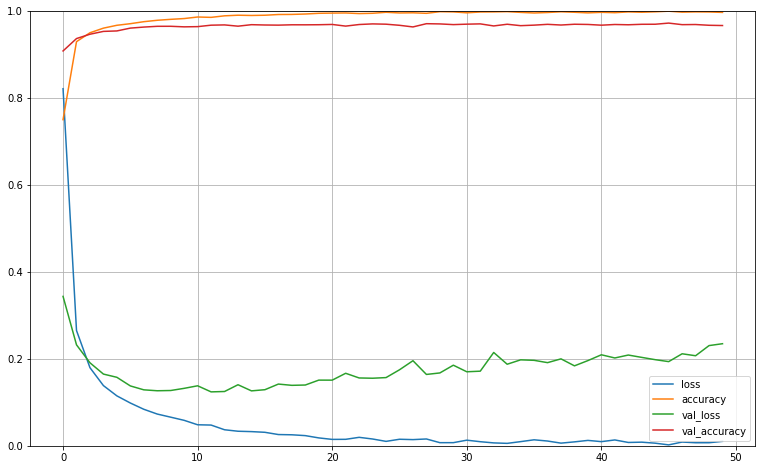

In [ ]:
pd.DataFrame(history_overfit.history).plot(figsize=(13, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

In [ ]:
score_overfit = model_overfit.evaluate(X_test, y_test)
score_overfit

219/219 [==============================] - 0s 1ms/step - loss: 0.2267 - accuracy: 0.9670


[0.22665643692016602, 0.9670000076293945]

Text(0.5, 1.0, 'Loss Score 0.22 , Accuracy Score: 0.97')

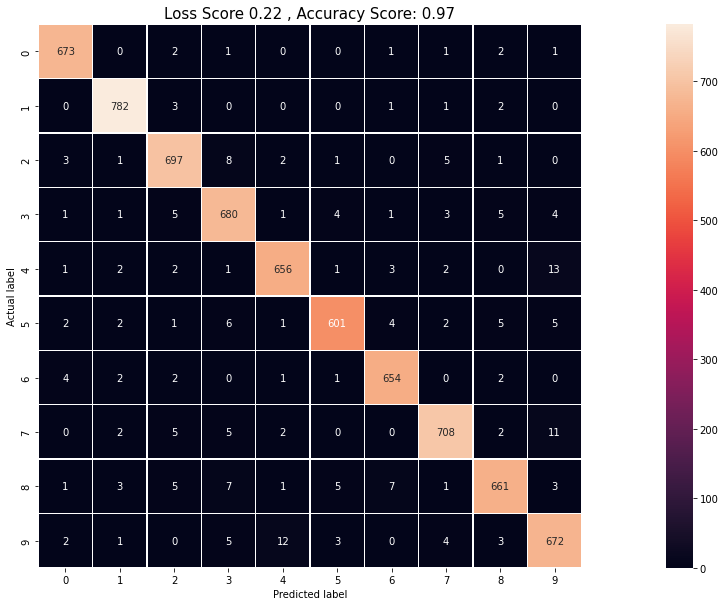

In [ ]:
import seaborn as sns
predictions = model_overfit.predict(X_test).argmax(axis=-1)
cm = confusion_matrix(y_test,predictions)
plt.figure(figsize=(30,10))
sns.heatmap(cm,annot=True, linewidths=.5, fmt="d" ,square=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Loss Score {:.2f} , Accuracy Score: {:.2f}'.format(score[0],score[1])
plt.title(all_sample_title,size=15)

In [ ]:
layer1 = layers.Dense(512, activation="relu")(flatten)
hidden1 = layers.Dense(256, activation='relu')(layer1)
hidden2 = layers.Dense(128, activation='relu')(hidden1)
output = layers.Dense(10, activation='softmax')(hidden2)
model_mlp = Model(inputs=[input_], outputs=[output] )
model_mlp.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 128)               32896     
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainab

In [ ]:
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=0.0001)
model_mlp.compile(loss="sparse_categorical_crossentropy", optimizer=opt,
              metrics=["accuracy"])
history_mlp = model_mlp.fit(X_train, y_train, shuffle=True , epochs=15, batch_size=256, validation_split=0.3)

Epoch 1/15
173/173 [==============================] - 5s 23ms/step - loss: 0.9077 - accuracy: 0.7804 - val_loss: 0.3405 - val_accuracy: 0.9038
Epoch 2/15
173/173 [==============================] - 4s 21ms/step - loss: 0.2728 - accuracy: 0.9247 - val_loss: 0.2431 - val_accuracy: 0.9310
Epoch 3/15
173/173 [==============================] - 4s 21ms/step - loss: 0.2063 - accuracy: 0.9426 - val_loss: 0.2013 - val_accuracy: 0.9418
Epoch 4/15
173/173 [==============================] - 4s 21ms/step - loss: 0.1698 - accuracy: 0.9515 - val_loss: 0.1753 - val_accuracy: 0.9500
Epoch 5/15
173/173 [==============================] - 4s 21ms/step - loss: 0.1435 - accuracy: 0.9595 - val_loss: 0.1578 - val_accuracy: 0.9541
Epoch 6/15
173/173 [==============================] - 4s 21ms/step - loss: 0.1224 - accuracy: 0.9648 - val_loss: 0.1417 - val_accuracy: 0.9593
Epoch 7/15
173/173 [==============================] - 4s 21ms/step - loss: 0.1070 - accuracy: 0.9696 - val_loss: 0.1308 - val_accuracy: 0.9625

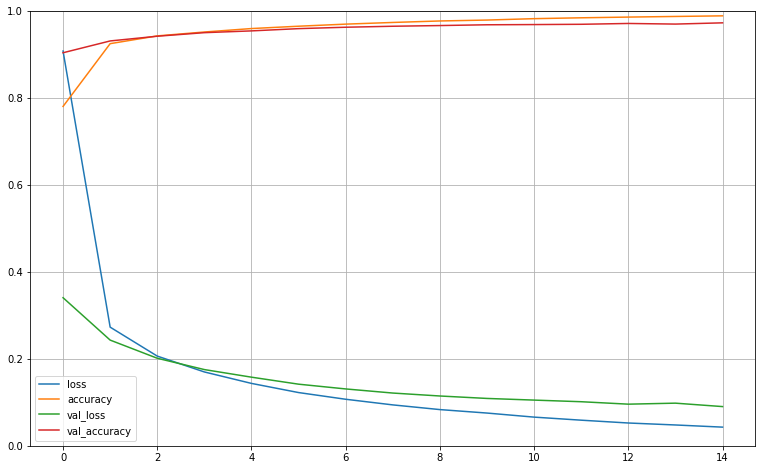

In [ ]:
pd.DataFrame(history_mlp.history).plot(figsize=(13, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

In [ ]:
score_mlp = model_mlp.evaluate(X_test, y_test)
score_mlp

219/219 [==============================] - 1s 3ms/step - loss: 0.0995 - accuracy: 0.9707


[0.09950464218854904, 0.970714271068573]

Text(0.5, 1.0, 'Loss Score 0.25 , Accuracy Score: 0.93')

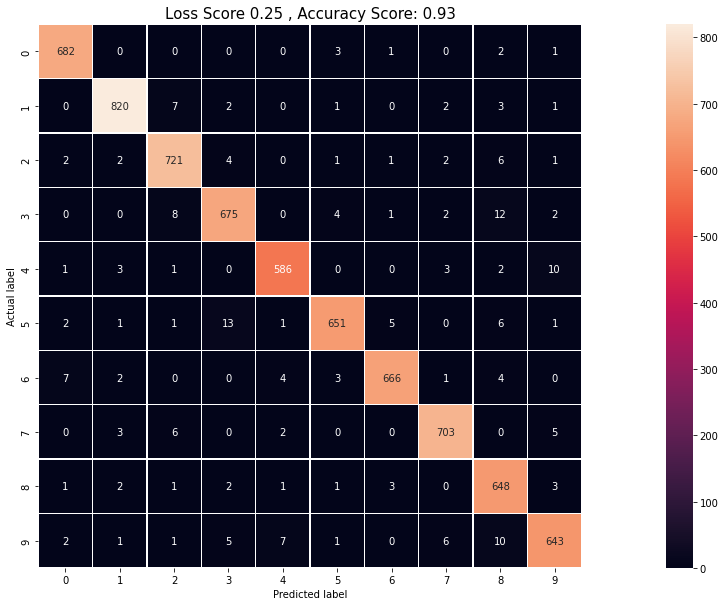

In [ ]:
import seaborn as sns
predictions = model_mlp.predict(X_test).argmax(axis=-1)
cm = confusion_matrix(y_test,predictions)
plt.figure(figsize=(30,10))
sns.heatmap(cm,annot=True, linewidths=.5, fmt="d" ,square=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Loss Score {:.2f} , Accuracy Score: {:.2f}'.format(score[0],score[1])
plt.title(all_sample_title,size=15)

# Deep Learning CNN

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(mnist_x, mnist_y, test_size=0.1, shuffle=True)

In [ ]:
X_train = X_train/ 255.0
X_test = X_test/ 255.0

In [ ]:
# We should reshape the image into 3 dimensions but since we have image in gray-scale we need only one value in third dimension
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [ ]:
X_train.shape

(63000, 28, 28, 1)

In [ ]:
input_ = layers.Input(shape=(28,28,1))
conv1 = layers.Conv2D(5, kernel_size = (3,3), activation='relu')(input_)
flat = layers.Flatten()(conv1)
hidden1 = layers.Dense(16, activation='relu')(flat)
output = layers.Dense(10, activation='softmax')(hidden1)
cnn_model = Model(inputs=input_, outputs=output)

In [ ]:
cnn_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 5)         50        
                                                                 
 flatten_2 (Flatten)         (None, 3380)              0         
                                                                 
 dense_16 (Dense)            (None, 16)                54096     
                                                                 
 dense_17 (Dense)            (None, 10)                170       
                                                                 
Total params: 54,316
Trainable params: 54,316
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cnn_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
cnn_history = cnn_model.fit(X_train, y_train, epochs=10, shuffle=True, validation_split=0.3)

Epoch 1/10
1379/1379 [==============================] - 17s 12ms/step - loss: 0.5282 - accuracy: 0.8450 - val_loss: 0.3666 - val_accuracy: 0.8854
Epoch 2/10
1379/1379 [==============================] - 15s 11ms/step - loss: 0.2863 - accuracy: 0.9162 - val_loss: 0.3026 - val_accuracy: 0.9110
Epoch 3/10
1379/1379 [==============================] - 16s 11ms/step - loss: 0.2461 - accuracy: 0.9284 - val_loss: 0.2556 - val_accuracy: 0.9258
Epoch 4/10
1379/1379 [==============================] - 15s 11ms/step - loss: 0.2195 - accuracy: 0.9365 - val_loss: 0.2278 - val_accuracy: 0.9316
Epoch 5/10
1379/1379 [==============================] - 18s 13ms/step - loss: 0.2018 - accuracy: 0.9403 - val_loss: 0.3228 - val_accuracy: 0.8999
Epoch 6/10
1379/1379 [==============================] - 18s 13ms/step - loss: 0.1878 - accuracy: 0.9451 - val_loss: 0.2060 - val_accuracy: 0.9392
Epoch 7/10
1379/1379 [==============================] - 16s 11ms/step - loss: 0.1743 - accuracy: 0.9492 - val_loss: 0.1861 -

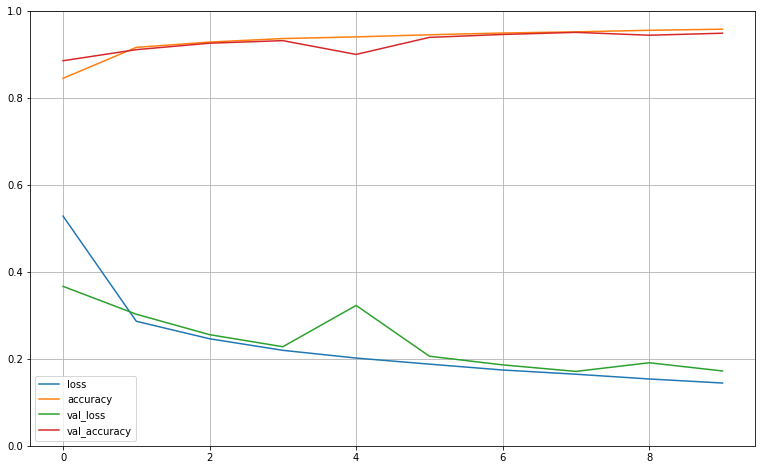

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(cnn_history.history).plot(figsize=(13, 8))
plt.grid(True)
plt.gca().set_ylim(0.00, 1.00) 
plt.show()

In [ ]:
score_cnn = cnn_model.evaluate(X_test, y_test)
score_cnn

219/219 [==============================] - 1s 5ms/step - loss: 0.1648 - accuracy: 0.9507


[0.16478703916072845, 0.9507142901420593]

Text(0.5, 1.0, 'Loss Score 0.19 , Accuracy Score: 0.94')

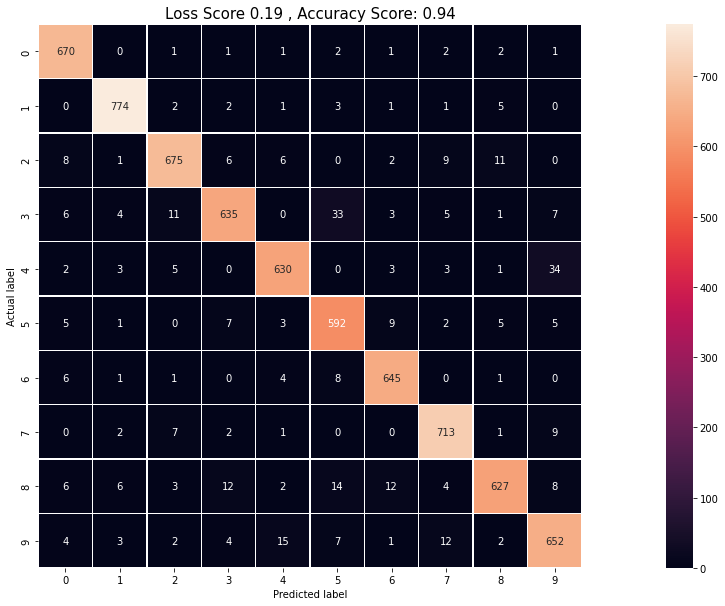

In [ ]:
import seaborn as sns
predictions = cnn_model.predict(X_test).argmax(axis=-1)
cm = confusion_matrix(y_test,predictions)
plt.figure(figsize=(30,10))
sns.heatmap(cm,annot=True, linewidths=.5, fmt="d" ,square=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Loss Score {:.2f} , Accuracy Score: {:.2f}'.format(score[0],score[1])
plt.title(all_sample_title,size=15)

In [ ]:
input_ = layers.Input(shape=(28,28,1))
conv1 = layers.Conv2D(64, kernel_size = (3,3), activation='relu')(input_)
pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = layers.Conv2D(64, kernel_size = (3,3), activation='relu')(pool1)
pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = layers.Conv2D(128, kernel_size = (3,3), activation='relu')(pool2)
pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)
flat = layers.Flatten()(pool2)
hidden1 = layers.Dense(128, activation='relu')(flat)
output = layers.Dense(10, activation='softmax')(hidden1)
model_multi_conv = Model(inputs=input_, outputs=output)

In [ ]:
model_multi_conv.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 1600)              0   

In [ ]:
model_multi_conv.compile(loss="sparse_categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
history_multi_conv = model_multi_conv.fit(X_train, y_train, epochs=5,shuffle=True, batch_size=256,  validation_split=0.3)

Epoch 1/5
173/173 [==============================] - 62s 355ms/step - loss: 0.3201 - accuracy: 0.9083 - val_loss: 0.1094 - val_accuracy: 0.9673
Epoch 2/5
173/173 [==============================] - 61s 353ms/step - loss: 0.0764 - accuracy: 0.9768 - val_loss: 0.0715 - val_accuracy: 0.9768
Epoch 3/5
173/173 [==============================] - 60s 349ms/step - loss: 0.0501 - accuracy: 0.9842 - val_loss: 0.0506 - val_accuracy: 0.9844
Epoch 4/5
173/173 [==============================] - 61s 355ms/step - loss: 0.0395 - accuracy: 0.9876 - val_loss: 0.0455 - val_accuracy: 0.9860
Epoch 5/5
173/173 [==============================] - 61s 353ms/step - loss: 0.0311 - accuracy: 0.9900 - val_loss: 0.0455 - val_accuracy: 0.9860


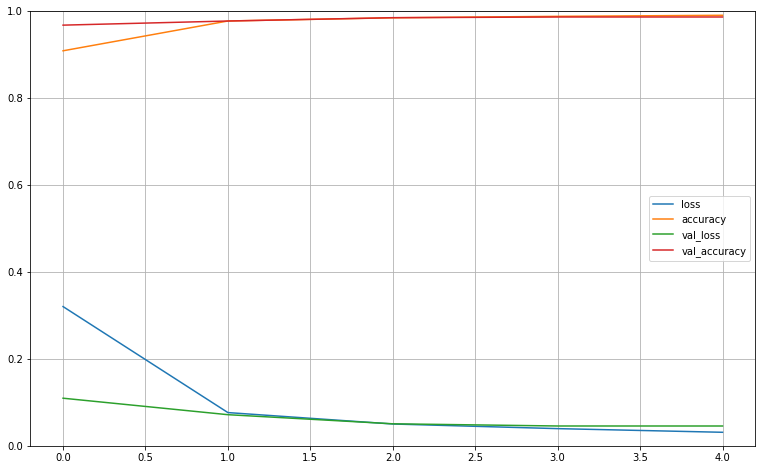

In [ ]:
pd.DataFrame(history_multi_conv.history).plot(figsize=(13, 8))
plt.grid(True)
plt.gca().set_ylim(0.00, 1.00) 
plt.show()

In [ ]:
score = model_multi_conv.evaluate(X_test, y_test)
score

219/219 [==============================] - 3s 12ms/step - loss: 0.0430 - accuracy: 0.9861


[0.04298367723822594, 0.9861428737640381]

Text(0.5, 1.0, 'Loss Score 0.04 , Accuracy Score: 0.99')

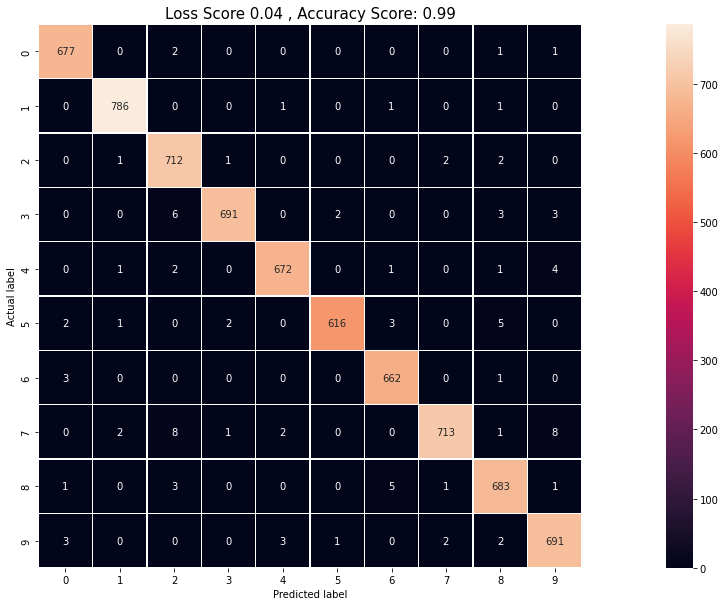

In [ ]:
import seaborn as sns
predictions = model_multi_conv.predict(X_test).argmax(axis=-1)
cm = confusion_matrix(y_test,predictions)
plt.figure(figsize=(30,10))
sns.heatmap(cm,annot=True, linewidths=.5, fmt="d" ,square=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Loss Score {:.2f} , Accuracy Score: {:.2f}'.format(score[0],score[1])
plt.title(all_sample_title,size=15)

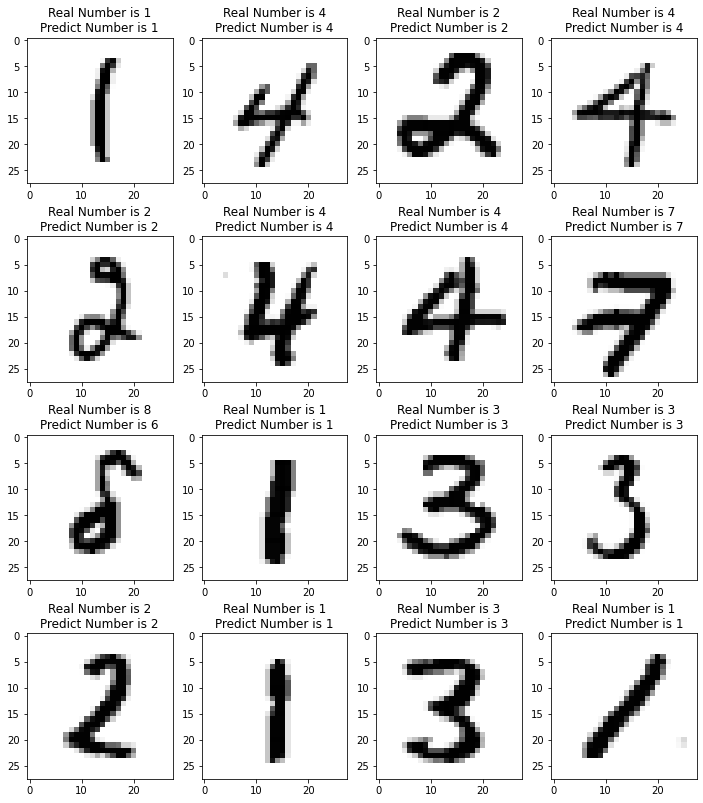

In [ ]:
y_pred = model_multi_conv.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i]}\nPredict Number is {y_pred[i].argmax()}");